In [27]:
import numpy as np
from numba import jit, prange, njit
from matplotlib import pyplot as plt
from scipy import interpolate
from scipy.stats import norm, gaussian_kde
import seaborn as sns
%matplotlib inline
import pandas as pd

In [3]:
def interpf(x1,x,y):
    return (x1-x[1])*(x1-x[2])/((x[0]-x[1])*(x[0]-x[2]))*y[0]+(x1-x[0])*(x1-x[2]) \
            /((x[1]-x[0])*(x[1]-x[2]))*y[1]+(x1-x[0])*(x1-x[1]) \
            /((x[2]-x[0])*(x[2]-x[1]))*y[2]
'''
For fwd_dif, pass the function to be derived and an array of tau
'''
@njit
def fwd_dif(func, tau, point):
    return (func(point + tau) - func(point)) / tau

# Problem 2.2

In [394]:
def func1(x):
    return x**2

def dfunc1(x):
    return 2*x

def func2(x):
    return x**5

def dfunc2(x):
    return 5*x**4

def func3(x):
    return np.sin(x)

def dfunc3(x):
    return np.cos(x)

def abs_err(f, df, x, h):
    return np.abs(df(x) - (f(x + h) - f(x)) / h)

tau = 10**(np.arange(0,-21, -1, dtype = float))

x = 1
errs1 = [abs_err(func1, dfunc1, x, h) for h in tau]
errs2 = [abs_err(func2, dfunc2, x, h) for h in tau]
x = 0
errs3 = [abs_err(func3, dfunc3, x, h) for h in tau]
x = np.pi/4
errs4 = [abs_err(func3, dfunc3, x, h) for h in tau]
x = np.pi/2
errs5 = [abs_err(func3, dfunc3, x, h) for h in tau]

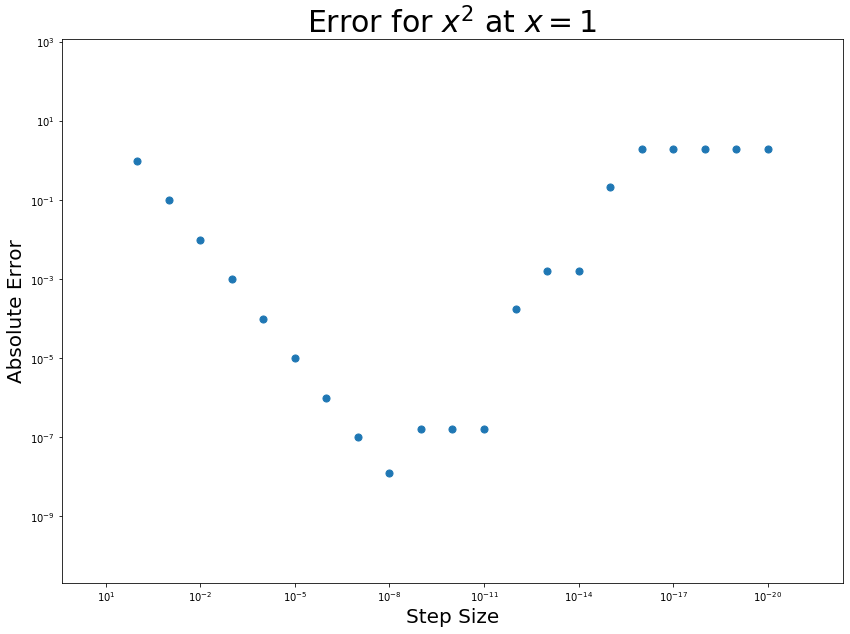

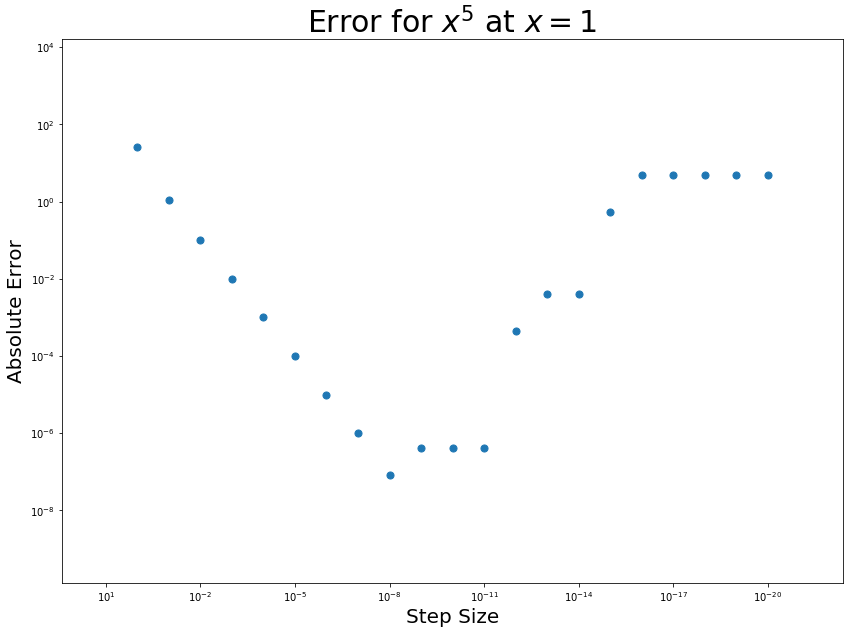

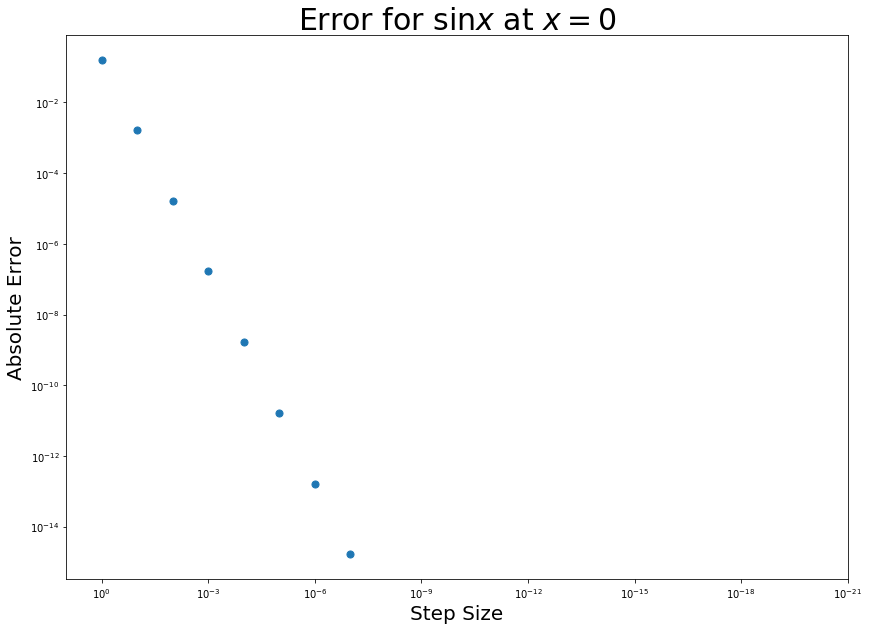

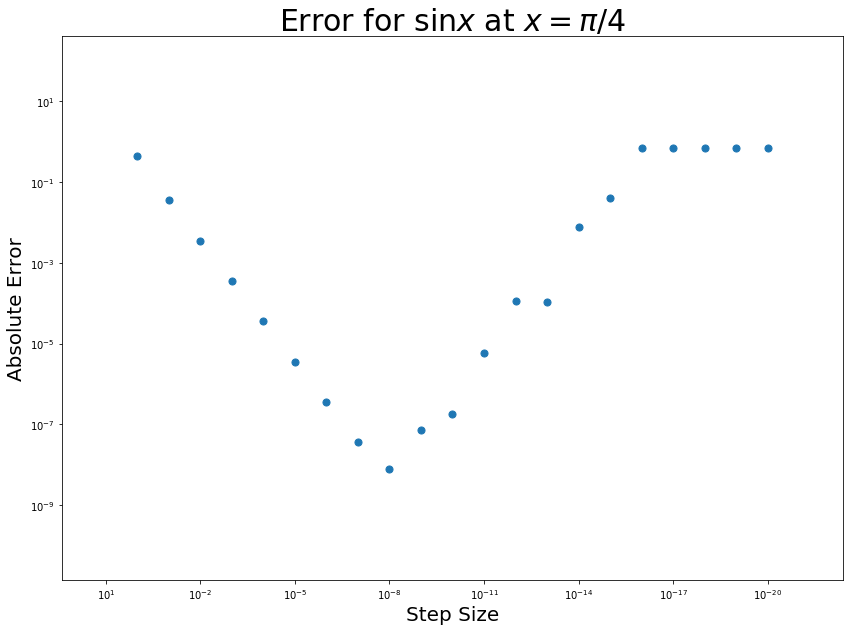

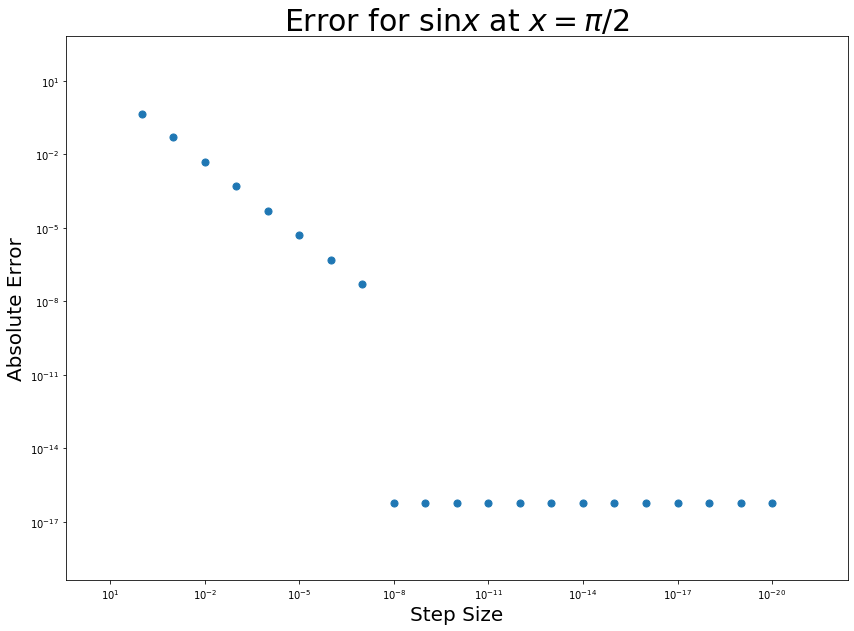

In [398]:
plt.figure(figsize = (14,10))
plt.xscale('log')
plt.yscale('log')
plt.xlim(250, 4e-23)
plt.scatter(tau,errs1,s=50)
plt.title('Error for $x^2$ at $x=1$', fontsize = 30)
plt.xlabel('Step Size', fontsize = 20)
plt.ylabel('Absolute Error', fontsize = 20)
plt.show()

plt.figure(figsize = (14,10))
plt.xscale('log')
plt.yscale('log')
plt.xlim(250, 4e-23)
plt.scatter(tau,errs2, s=50)
plt.title('Error for $x^5$ at $x=1$', fontsize = 30)
plt.xlabel('Step Size', fontsize = 20)
plt.ylabel('Absolute Error', fontsize = 20)
plt.show()

plt.figure(figsize = (14,10))
plt.scatter(tau,errs3,s=50)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,1e-21)
plt.ylim(3.33e-16,.79)
plt.title('Error for $\sin x$ at $x=0$', fontsize = 30)
plt.xlabel('Step Size', fontsize = 20)
plt.ylabel('Absolute Error', fontsize = 20)
plt.show()

plt.figure(figsize = (14,10))
plt.xscale('log')
plt.yscale('log')
plt.xlim(250, 4e-23)
plt.scatter(tau,errs4,s=50)
plt.title('Error for $\sin x$ at $x=\pi / 4$', fontsize = 30)
plt.xlabel('Step Size', fontsize = 20)
plt.ylabel('Absolute Error', fontsize = 20)
plt.show()

plt.figure(figsize = (14,10))
plt.xscale('log')
plt.yscale('log')
plt.xlim(250, 4e-23)
plt.scatter(tau,errs5,s=50)
plt.title('Error for $\sin x$ at $x=\pi / 2$', fontsize = 30)
plt.xlabel('Step Size', fontsize = 20)
plt.ylabel('Absolute Error', fontsize = 20)
plt.show()

# Make sure that my version of _balls_ works with range interpolation

BOOK TEST? (BOOLEAN): 1

EULER METHOD RESULTS:
______________________________________________________
Maximum Range: 125.73530
Flight Time: 5.8
______________________________________________________


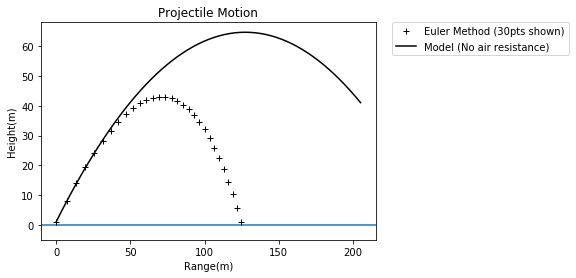

INTERPOLATION RESULTS: (5 significant figures)
______________________________________________________
Interpolated range: 124.83
Model range: 125.74
Percent Improvement: 0.72419 percent
______________________________________________________
Interpolated time: 5.7319
Model time: 5.8
Percent Improvement: 1.1888 percent
______________________________________________________


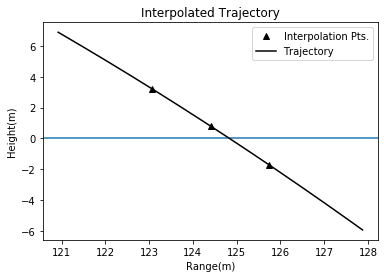

In [355]:
'''
This will run the balls program from the book with a 
variety of parameters and perform a range interpolation 
with percent errors
'''

#to match book, choose book test to be 1 which gives paramaters:
#y0=1
#vmag=50
#theta=45
#air resis=1
#tau=.1
tester = float(input('BOOK TEST? (BOOLEAN): '))
if tester == 1:
    y0=1
    vmag=50
    theta=np.radians(45)
    rho=1.2
    tau=.1
elif tester == 2:
    y0=0
    vmag=50
    theta=np.radians(45)
    rho=0
    tau=float(input('Tau: '))
else:

#Inputs

    y0=float(input('Initial height (m): '))
    vmag=float(input('Initial velocity (m/s): '))
    theta=np.radians(float(input('Angle of trajectory (degrees): ')))
    if int(input('Air resistance? (BOOLEAN): '))==1:
        rho=1.2
    else:
        rho=0
    tau=float(input('Timestep (sec): '))

#initialize variables

v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
v1=v
r=np.array([0,y0])
r1=r
x=[]
basex=[]
y=[]
basey=[]
t=0
accel=[]

#Physical parameter calculations

Cd=.35
area=4.3e-3
grav=9.81
mass=.145

drag=-.5*Cd*rho*area/mass

#Loop

maxstep=10000000
for i in range(maxstep):
    x.append(r[0])
    y.append(r[1])
    t=(i)*tau
    basex.append(r1[0]+v1[0]*t)
    basey.append(r1[1]+v1[1]*t-.5*grav*t**2)
    accel=drag*np.linalg.norm(v)*v
    accel[1]=accel[1]-grav
    r=r+tau*v
    v=v+tau*accel
    if r[1]<0:
        x.append(r[0])
        y.append(r[1])
        t1=i
        break

#Print results
euler_range=x[-1]
euler_time=t1*tau
print('')
print('EULER METHOD RESULTS:')
print('______________________________________________________')
print('Maximum Range: %2.5f'%euler_range)
print('Flight Time: %.3g'%euler_time)
print('______________________________________________________')

#Plot results

if int(len(x)/30)==0:
    marker=1
else:
    marker=int(len(x)/30)
plt.figure()
plt.axhline();
plt.plot(x,y,'k+',label='Euler Method (30pts shown)',markevery=marker);
plt.plot(basex,basey,'k-',label='Model (No air resistance)');
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0);
plt.title('Projectile Motion');
plt.ylabel('Height(m)');
plt.xlabel('Range(m)');
plt.show();

#Interpolation

zoomcoeff=.8
domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))

scale = tau*.01
estx=np.arange(domlow,domhigh,scale)
esty=interpf(estx,x[-3:],y[-3:])
# modelx=np.arange(domlow,domhigh,.001)
# modely=interpf(modelx,basex[-3:],basey[-3:])

plt.figure();
plt.axhline();
plt.plot(x[-3:],y[-3:],'k^',label='Interpolation Pts.');
plt.plot(estx,esty,'k',label='Trajectory');
plt.title('Interpolated Trajectory');
plt.ylabel('Height(m)');
plt.xlabel('Range(m)');
#plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0);
plt.legend(loc='upper right');
# Interpolated range and time
for i in range(len(estx)):
    if round(estx[i],int(-np.log10(scale))) == round(x[-2],int(-np.log10(scale))):
        inter_x1 = estx[i]; inter_y1 = esty[i]
    if round(estx[i],int(-np.log10(scale))) == round(x[-3],int(-np.log10(scale))):
        inter_x2 = estx[i]; inter_y2 = esty[i]
    if esty[i-1] * esty[i] < 0:
        inter_x0 = estx[i-1]; inter_y0 = esty[i-1]
d1 = np.sqrt((inter_x1 - inter_x2)**2 + (inter_y1 - inter_y2)**2)
d2 = np.sqrt((inter_x1 - inter_x0)**2 + (inter_y1 - inter_y0)**2)
t2 = tau * d2/d1
inter_range = inter_x0
inter_time = (t1 - 1) * tau + t2

# Absolute errors using interpolation as the theoretical value
err_range = np.abs(inter_range - euler_range)/inter_range * 100
err_time = np.abs(inter_time - euler_time)/inter_time * 100

print('INTERPOLATION RESULTS: (5 significant figures)')
print('______________________________________________________')
print('Interpolated range: %.5g'%inter_range)
print('Model range: %.5g'%euler_range)
print('Percent Improvement: %.5g percent'%err_range)
print('______________________________________________________')
print('Interpolated time: %.5g'%inter_time)
print('Model time: %.5g'%euler_time)
print('Percent Improvement: %.5g percent'%err_time)
print('______________________________________________________')

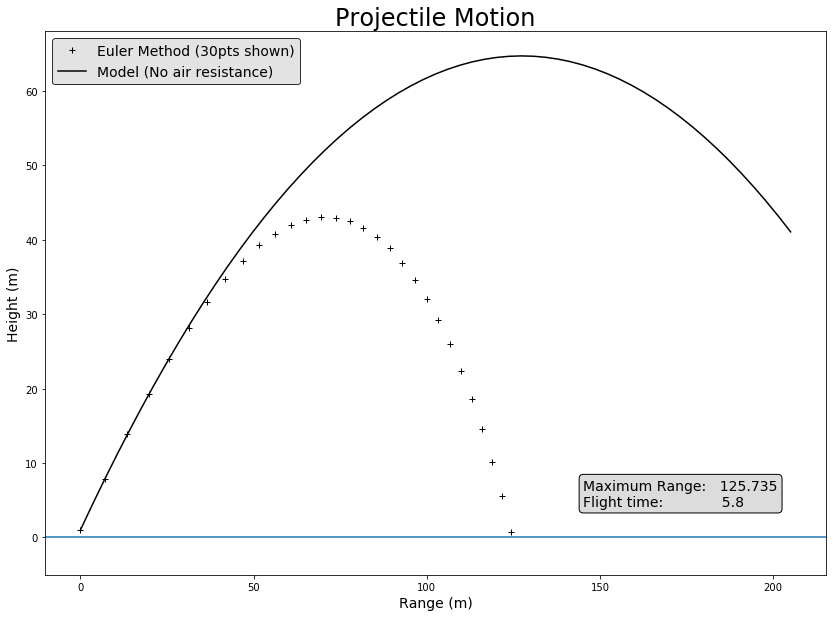

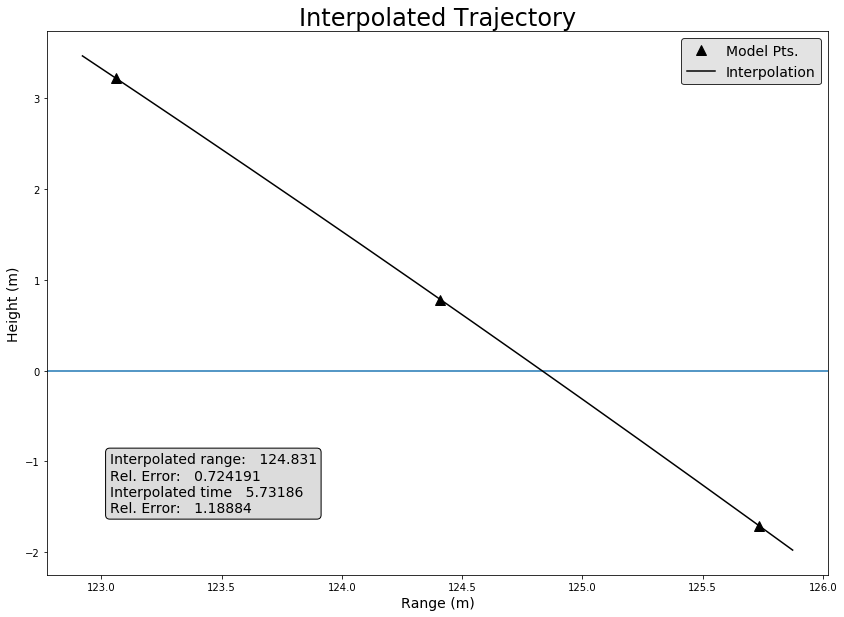

In [46]:
plt.figure(figsize = (14, 10))
plt.axhline()
plt.plot(x,y,'k+',label='Euler Method (30pts shown)',markevery=marker)
plt.plot(basex,basey,'k-',label='Model (No air resistance)')
plt.annotate('Maximum Range:   %.6g\nFlight time:             %.6g'%(euler_range, euler_time),
            xy = (.7, .18), xycoords = 'figure fraction', fontsize = 14,
            bbox=dict(boxstyle="round", fc="gainsboro"))
plt.legend(loc='upper left', fontsize = 14, edgecolor = 'black', facecolor = 'gainsboro')
plt.title('Projectile Motion', fontsize = 24)
plt.ylabel('Height (m)', fontsize = 14)
plt.xlabel('Range (m)', fontsize = 14)

plt.figure(figsize = (14, 10))
plt.axhline()
plt.plot(x[-3:],y[-3:],'k^',label='Model Pts.', markersize=10)
plt.plot(estx[2000:len(estx)-2000],esty[2000:len(estx)-2000],'k',label='Interpolation')
plt.annotate('Interpolated range:   %.6g\nRel. Error:   %.6g\nInterpolated time   %.6g\nRel. Error:   %.6g'%
             (inter_range, err_range, inter_time, err_time),
            xy = (.13, .17), xycoords = 'figure fraction', fontsize = 14,
            bbox=dict(boxstyle="round", fc="gainsboro"))
plt.title('Interpolated Trajectory', fontsize=24)
plt.ylabel('Height (m)', fontsize = 14)
plt.xlabel('Range (m)', fontsize = 14)
plt.legend(loc='upper right', fontsize = 14, edgecolor = 'black', facecolor = 'gainsboro')

# 2.3 truncated code

In [77]:
times = 10**-np.arange(1,7,dtype=float)
y0=0
v0=50
theta=np.radians(45)
rho=0

def corr_euler(y0, v0, theta, rho, tau):
    v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
    v1=v
    r=np.array([0,y0])
    r1=r
    t=0
    
    x=[]
    basex=[]
    y=[]
    basey=[]
    accel=[]

    Cd=.35
    area=4.3e-3
    grav=9.81
    mass=.145

    drag=-.5*Cd*rho*area/mass
    
    maxstep=10000000
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=(i)*tau
        basex.append(r1[0]+v1[0]*t)
        basey.append(r1[1]+v1[1]*t-.5*grav*t**2)
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        r=r+tau*v
        v=v+tau*accel
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t1=i
            break
    
    euler_range=x[-1]
    euler_time=t1*tau
    
    zoomcoeff=.8
    domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
    domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))

    scale = tau*.01
    estx=np.arange(domlow,domhigh,scale)
    esty=interpf(estx,x[-3:],y[-3:])
    
    for i in range(len(estx)):
        if round(estx[i],int(-np.log10(scale))) == round(x[-2],int(-np.log10(scale))):
            inter_x1 = estx[i]; inter_y1 = esty[i]
        if round(estx[i],int(-np.log10(scale))) == round(x[-3],int(-np.log10(scale))):
            inter_x2 = estx[i]; inter_y2 = esty[i]
        if esty[i-1] * esty[i] < 0:
            inter_x0 = estx[i-1]; inter_y0 = esty[i-1]
    d1 = np.sqrt((inter_x1 - inter_x2)**2 + (inter_y1 - inter_y2)**2)
    d2 = np.sqrt((inter_x1 - inter_x0)**2 + (inter_y1 - inter_y0)**2)
    t2 = tau * d2/d1
    inter_range = inter_x0
    inter_time = (t1 - 1) * tau + t2

    err_range = np.abs(inter_range - euler_range)/inter_range * 100
    err_time = np.abs(inter_time - euler_time)/inter_time * 100
    print(tau)
    return err_range, err_time

improvements = [corr_euler(y0, v0, theta, rho, tau) for tau in times]


0.1
0.01
0.001
0.0001
1e-05
1e-06


## Problem 2.3 Error
##### Calculated from running the above code for $\tau=$ times

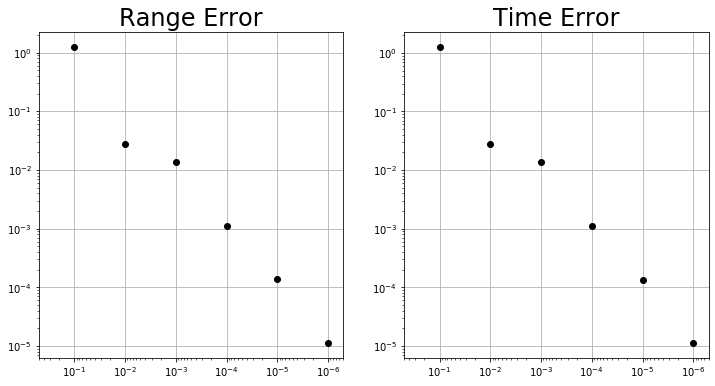

,Tau,Range Err.,Time Err.
0,0.100000,1.258985,1.275466
1,0.010000,0.027466,0.027364
2,0.001000,0.013594,0.013595
3,0.000100,0.001107,0.001107
4,0.000010,0.000136,0.000136
5,0.000001,0.000011,0.000011


In [79]:
range_errs, time_errs = zip(*improvements)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.grid(True)
plt.xlim(.5, .5e-6)
plt.title('Range Error', fontsize=24)
plt.loglog(times, range_errs, 'ko')
plt.subplot(122)
plt.grid(True)
plt.xlim(.5, .5e-6)
plt.title('Time Error', fontsize=24)
plt.loglog(times, time_errs, 'ko')
plt.show()
pd.DataFrame({'Tau':times,'Range Err.':range_errs,'Time Err.':time_errs})

# This incorporates all 3 methods

BOOK TEST? (BOOLEAN): 1

EULER METHOD RESULTS:
______________________________________________________
Maximum Range: 125.73530
Flight Time: 5.8
______________________________________________________

EULER-KROMER METHOD RESULTS:
______________________________________________________
Maximum Range: 119.52532
Flight Time: 5.5
______________________________________________________

MIDPOINT METHOD RESULTS:
______________________________________________________
Maximum Range: 123.30478
Flight Time: 5.7
______________________________________________________


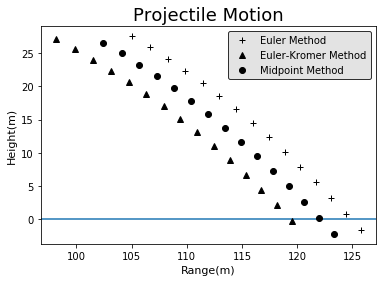

In [400]:
######    This will run the balls program from the book with a 
######    variety of parameters and perform a range interpolation
######    with percent errors using 3 different methods


#to match book, choose book test to be 1 which gives paramaters:
#y0=1
#vmag=50
#theta=45
#air resis=1
#tau=.1

if float(input('BOOK TEST? (BOOLEAN): '))==1:
    y0=1
    vmag=50
    theta=np.radians(45)
    rho=1.2
    tau=.1
else:

#Inputs

    y0=float(input('Initial height (m): '))
    vmag=float(input('Initial velocity (m/s): '))
    theta=np.radians(float(input('Angle of trajectory (degrees): ')))
    if int(input('Air resistance? (BOOLEAN): '))==1:
        rho=1.2
    else:
        rho=0
    tau=float(input('Timestep (sec): '))

#initialize variables

v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
v1=v
r=np.array([0,y0])
r1=r
xeu=[]
xek=[]
xmp=[]
basex=[]
yeu=[]
yek=[]
ymp=[]
basey=[]
t=0
accel=[]

#Physical parameter calculations

Cd=.35
area=4.3e-3
grav=9.81
mass=.145

drag=-.5*Cd*rho*area/mass

#Loop

maxstep=1000
for i in range(maxstep):
    t=(i)*tau
    basex.append(r1[0]+v1[0]*t)
    basey.append(r1[1]+v1[1]*t-.5*grav*t**2)
    accel=0*np.linalg.norm(v)*v
    accel[1]=accel[1]-grav
    r=r+tau*v
    v=v+tau*accel
    if r[1]<0:
        basex.append(r1[0]+v1[0]*t)
        basey.append(r1[1]+v1[1]*t-.5*grav*t**2)
        t1=i
        break
v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
v1=v
r=np.array([0,y0])
r1=r
tba=t1
t=0
for i in range(maxstep):
    xeu.append(r[0])
    yeu.append(r[1])
    t=(i)*tau
    accel=drag*np.linalg.norm(v)*v
    accel[1]=accel[1]-grav
    r=r+tau*v
    v=v+tau*accel
    if r[1]<0:
        xeu.append(r[0])
        yeu.append(r[1])
        t1=i
        break
v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
v1=v
r=np.array([0,y0])
r1=r
teu=t1
t=0
for i in range(maxstep):
    xek.append(r[0])
    yek.append(r[1])
    t=(i)*tau
    accel=drag*np.linalg.norm(v)*v
    accel[1]=accel[1]-grav
    v=v+tau*accel
    r=r+tau*v
    if r[1]<0:
        xek.append(r[0])
        yek.append(r[1])
        t1=i
        break
v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
v1=v
r=np.array([0,y0])
r1=r
tek=t1
t=0
for i in range(maxstep):
    xmp.append(r[0])
    ymp.append(r[1])
    t=(i)*tau
    accel=drag*np.linalg.norm(v)*v
    accel[1]=accel[1]-grav
    vnew=v+tau*accel
    r=r+tau*((v+vnew)/2)
    v=vnew
    if r[1]<0:
        xmp.append(r[0])
        ymp.append(r[1])
        t1=i
        break
tmp=t1

#Print results

print('\nEULER METHOD RESULTS:')
print('______________________________________________________')
print('Maximum Range: %2.5f'%xeu[-1])
t=teu*tau
print('Flight Time: %.3g'%t)
print('______________________________________________________')
print('\nEULER-KROMER METHOD RESULTS:')
print('______________________________________________________')
print('Maximum Range: %2.5f'%xek[-1])
t=tek*tau
print('Flight Time: %.3g'%t)
print('______________________________________________________')
print('\nMIDPOINT METHOD RESULTS:')
print('______________________________________________________')
print('Maximum Range: %2.5f'%xmp[-1])
t=tmp*tau
print('Flight Time: %.3g'%t)
print('______________________________________________________')



#Plot results

xx=15

if int(len(basex)/30)==0:
    marker=1
else:
    marker=int(len(basex)/30)
plt.figure()
plt.axhline();
plt.plot(xeu[-xx:],yeu[-xx:],'k+',label='Euler Method',markevery=1);
plt.plot(xek[-xx:],yek[-xx:],'k^',label='Euler-Kromer Method',markevery=1);
plt.plot(xmp[-xx:],ymp[-xx:],'ko',label='Midpoint Method',markevery=1);
if rho==0:
    plt.plot(basex[-xx:],basey[-xx:],'k-',label='Model (No air resistance)');
plt.legend(facecolor='gainsboro',edgecolor='black');
plt.title('Projectile Motion', fontsize=18);
plt.ylabel('Height(m)',fontsize=11);
plt.xlabel('Range(m)',fontsize=11);
plt.show();

# Problem 2.5

Euler Max Angle:  39.30000000000013      Euler Max Range:  126.08930988006811
Midpoint Max Angle:  39.30000000000013      Midpoint Max Range:  125.78812141009462
Euler-Cromer Max Angle:  39.400000000000134      Euler-Cromer Max Range:  125.48719131070771


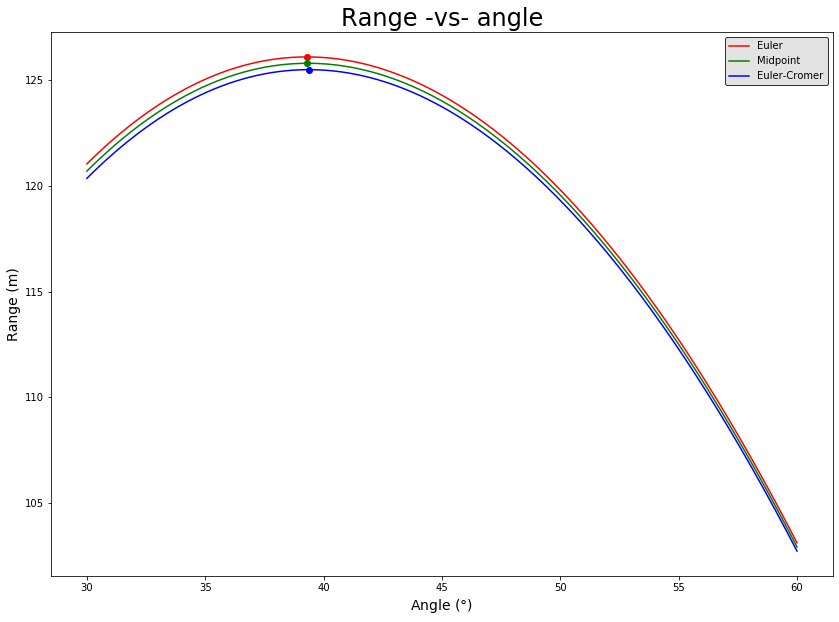

In [369]:
#Inputs

y0=float(1)
vmag=float(50)
theta1=np.radians(np.arange(30, 60.1,step = .1))
rho=1.2
tau=.01
range_eu = []
range_ek = []
range_mp = []

#Physical parameter calculations

Cd=.35
area=4.3e-3
grav=9.81
mass=.145

drag=-.5*Cd*rho*area/mass
maxstep=10000000

#Loop
for theta in theta1:
    v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
    v1=v
    r=np.array([0,y0])
    r1=r
    x=[]
    y=[]
    t=0
    accel=[]
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=(i)*tau
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        vnew=v+tau*accel
        r=r+tau*((v+vnew)/2)
        v=vnew
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t1=i
            break
    euler_range=x[-1]
    zoomcoeff=.8
    domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
    domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))
    scale = tau*.01
    estx=np.arange(domlow,domhigh,scale)
    esty=interpf(estx,x[-3:],y[-3:])
    for i in range(len(estx)):
        if esty[i-1] * esty[i] < 0:
            inter_range = estx[i-1]
    
    range_mp.append(inter_range)
    
    v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
    v1=v
    r=np.array([0,y0])
    r1=r
    x=[]
    y=[]
    t=0
    accel=[]
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=(i)*tau
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        v=v+tau*accel
        r=r+tau*v
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t1=i
            break
    euler_range=x[-1]
    zoomcoeff=.8
    domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
    domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))
    scale = tau*.01
    estx=np.arange(domlow,domhigh,scale)
    esty=interpf(estx,x[-3:],y[-3:])
    for i in range(len(estx)):
        if esty[i-1] * esty[i] < 0:
            inter_range = estx[i-1]
    
    range_ek.append(inter_range)
    
    v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
    v1=v
    r=np.array([0,y0])
    r1=r
    x=[]
    y=[]
    t=0
    accel=[]
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=(i)*tau
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        r=r+tau*v
        v=v+tau*accel
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t1=i
            break
    euler_range=x[-1]
    zoomcoeff=.8
    domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
    domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))
    scale = tau*.01
    estx=np.arange(domlow,domhigh,scale)
    esty=interpf(estx,x[-3:],y[-3:])
    for i in range(len(estx)):
        if esty[i-1] * esty[i] < 0:
            inter_range = estx[i-1]
    
    range_eu.append(inter_range)

plts = [range_eu, range_mp, range_ek]
labs = ['Euler', 'Midpoint', 'Euler-Cromer']
for i in range(3):
    print('%s Max Angle: '%labs[i], np.degrees(theta1[np.argmax(plts[i])]),
         '     %s Max Range: '%labs[i], np.max(plts[i]))
cols = ['red', 'green', 'blue']
plt.figure(figsize=(14,10))
for i in range(3):
    plt.plot(np.degrees(theta1), plts[i], color = cols[i], label = labs[i])
    plt.plot(np.degrees(theta1[np.argmax(plts[i])]), plts[i][np.argmax(plts[i])],
             color = cols[i], marker = 'o')
plt.legend(facecolor = 'gainsboro', edgecolor='black')
plt.title('Range -vs- angle', fontsize=24)
plt.xlabel('Angle $(\degree)$', fontsize=14)
plt.ylabel('Range (m)',fontsize=14)
plt.show()

### Zoomed in view

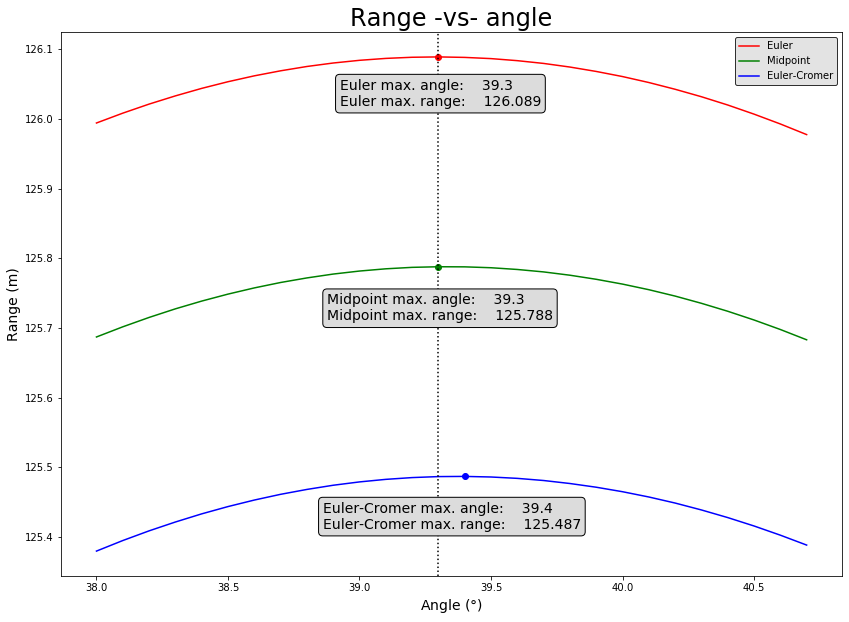

In [360]:
plt.figure(figsize=(14,10))
for i in range(3):
    plt.plot(np.degrees(theta1[80:108]), plts[i][80:108], 
             color = cols[i], label = labs[i])
    plt.plot(np.degrees(theta1[np.argmax(plts[i])]), 
             plts[i][np.argmax(plts[i])], color = cols[i], marker = 'o')
plt.legend(edgecolor = 'black', facecolor = 'gainsboro')
plt.title('Range -vs- angle', fontsize=24)
plt.xlabel('Angle $(\degree)$', fontsize=14)
plt.ylabel('Range (m)',fontsize=14)
plt.axvline(39.3, ls=':', c='k')
plt.annotate('Midpoint max. angle:    %.6g\nMidpoint max. range:    %.6g'%
             (np.degrees(theta1[np.argmax(plts[1])]), np.max(plts[1])),
            xy = (.385, .485), xycoords = 'figure fraction', fontsize = 14,
            bbox=dict(boxstyle="round", fc="gainsboro"))
plt.annotate('Euler max. angle:    %.6g\nEuler max. range:    %.6g'%
             (np.degrees(theta1[np.argmax(plts[0])]), np.max(plts[0])),
            xy = (.4, .83), xycoords = 'figure fraction', fontsize = 14,
            bbox=dict(boxstyle="round", fc="gainsboro"))
plt.annotate('Euler-Cromer max. angle:    %.6g\nEuler-Cromer max. range:    %.6g'%
             (np.degrees(theta1[np.argmax(plts[2])]), np.max(plts[2])),
            xy = (.38, .15), xycoords = 'figure fraction', fontsize = 14,
            bbox=dict(boxstyle="round", fc="gainsboro"))
plt.show()

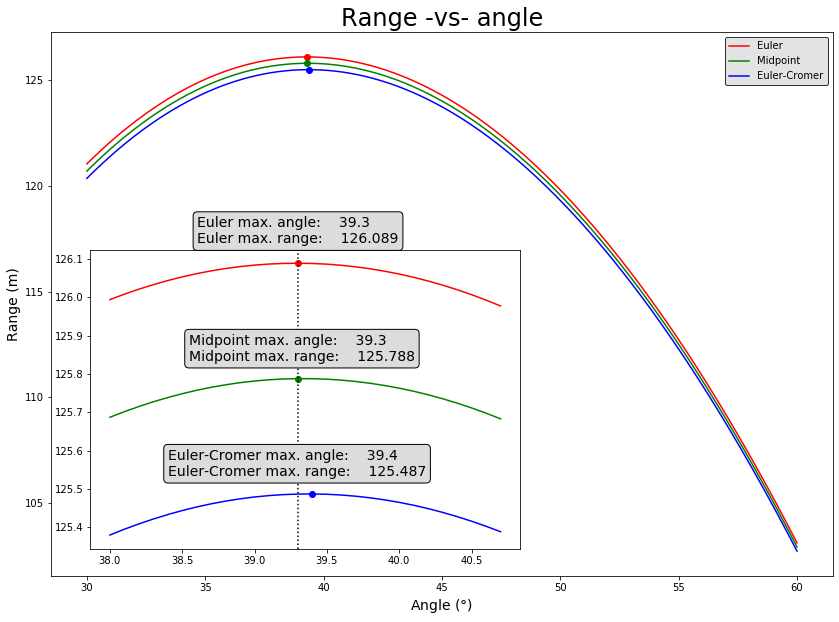

In [389]:
fig, ax = plt.subplots(figsize=(14,10))
for i in range(3):
    ax.plot(np.degrees(theta1), plts[i], color = cols[i], label = labs[i])
    ax.plot(np.degrees(theta1[np.argmax(plts[i])]), plts[i][np.argmax(plts[i])],
             color = cols[i], marker = 'o')

axin = ax.inset_axes([0.05, 0.05, 0.55, 0.55])
for i in range(3):
    axin.plot(np.degrees(theta1[80:108]), plts[i][80:108], 
             color = cols[i], label = labs[i])
    axin.plot(np.degrees(theta1[np.argmax(plts[i])]), 
             plts[i][np.argmax(plts[i])], color = cols[i], marker = 'o')
axin.axvline(39.3, ls=':', c='k')
axin.annotate('Midpoint max. angle:    %.6g\nMidpoint max. range:    %.6g'%
             (np.degrees(theta1[np.argmax(plts[1])]), np.max(plts[1])),
            xy = (.225, .42), xycoords = 'figure fraction', fontsize = 14,
            bbox=dict(boxstyle="round", fc="gainsboro"))
axin.annotate('Euler max. angle:    %.6g\nEuler max. range:    %.6g'%
             (np.degrees(theta1[np.argmax(plts[0])]), np.max(plts[0])),
            xy = (.235, .609), xycoords = 'figure fraction', fontsize = 14,
            bbox=dict(boxstyle="round", fc="gainsboro"))
axin.annotate('Euler-Cromer max. angle:    %.6g\nEuler-Cromer max. range:    %.6g'%
             (np.degrees(theta1[np.argmax(plts[2])]), np.max(plts[2])),
            xy = (.2, .235), xycoords = 'figure fraction', fontsize = 14,
            bbox=dict(boxstyle="round", fc="gainsboro"))
    
ax.legend(facecolor = 'gainsboro', edgecolor='black')
ax.set_title('Range -vs- angle', fontsize=24)
ax.set_xlabel('Angle $(\degree)$', fontsize=14)
ax.set_ylabel('Range (m)',fontsize=14)
plt.show()

# Problem 2.9

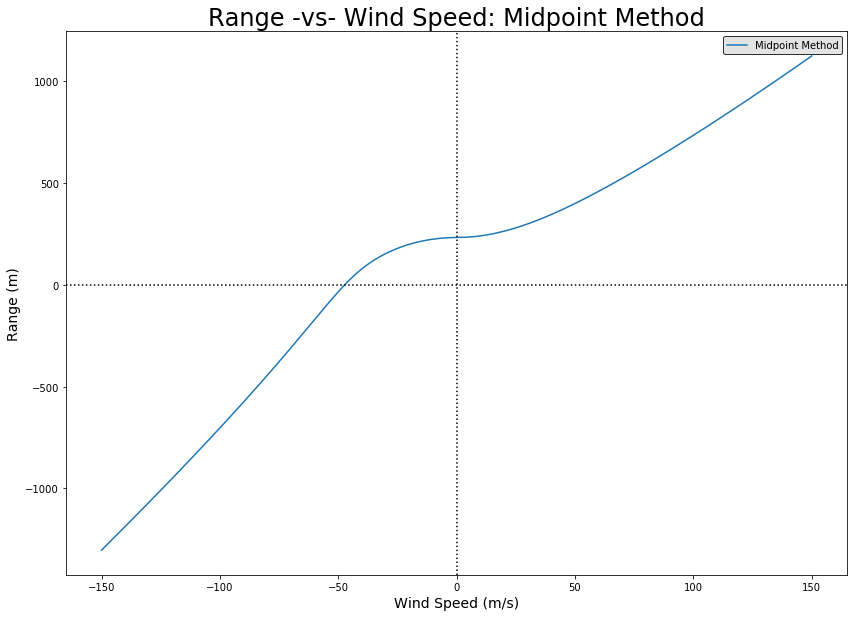

In [269]:
y0=1
vmag=100
theta=np.radians(35)
rho=1.2
windlist=np.linspace(-150, 150, num=1000)

Cd=.35
area=4.3e-3
grav=9.81
mass=.145

drag=-.5*Cd*rho*area/mass

rangelist=[]
range_mp = []

maxstep=100000
for j in range(len(windlist)):
    v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
    r=np.array([0,y0])
    x=[]
    y=[]
    t=0
    accel=[]
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=(i)*tau
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        accel[0]=accel[0]-drag*windlist[j]*np.abs(windlist[j])
        vnew=v+tau*accel
        r=r+tau*((v+vnew)/2)
        v=vnew
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t1=i
            break
    zoomcoeff=.8
    domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
    domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))
    scale = tau*.01
    estx=np.linspace(domlow,domhigh,2000)
    esty=interpf(estx,x[-3:],y[-3:])
    for i in range(len(estx)):
        if esty[i-1] * esty[i] < 0:
            inter_range = estx[i-1]
    
    range_mp.append(inter_range)

plt.figure(figsize = (14,10))
plt.plot(windlist, range_mp, label = 'Midpoint Method')
plt.axvline(0, c = 'black', ls = ':')
plt.axhline(0, c = 'black', ls = ':')
plt.title('Range -vs- Wind Speed: Midpoint Method', fontsize=24)
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('Range (m)', fontsize=14)
plt.legend(edgecolor = 'black', facecolor = 'gainsboro')
plt.show()

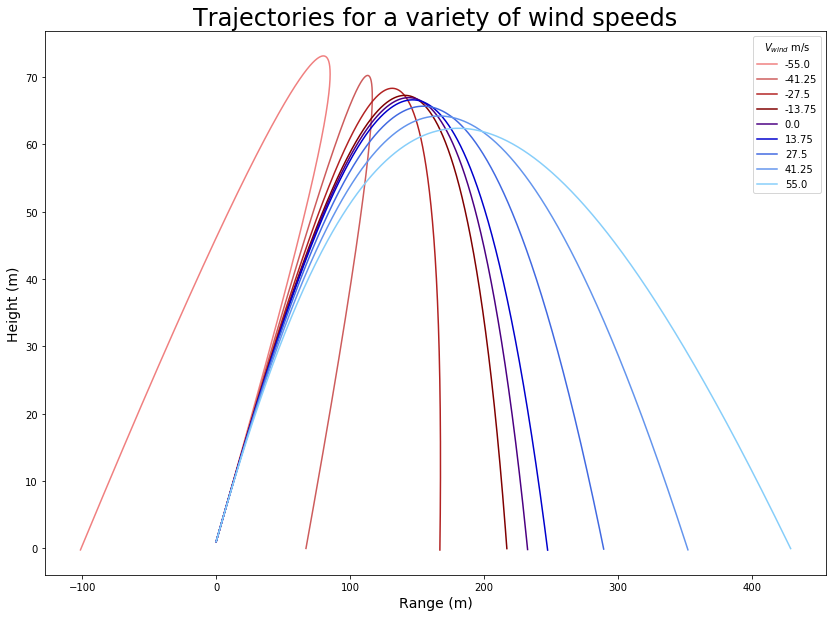

In [271]:
y0=1
vmag=100
theta=np.radians(35)
rho=1.2
windlist=np.linspace(-55,55,9)
cols = ['lightcoral', 'indianred', 'firebrick', 'maroon', 'indigo', 'mediumblue', 'royalblue', 'cornflowerblue', 'lightskyblue']
rangesx = []
rangesy = []

#Physical parameter calculations

Cd=.35
area=4.3e-3
grav=9.81
mass=.145

drag=-.5*Cd*rho*area/mass
for j in windlist:
    v=np.array([vmag*np.cos(theta), vmag*np.sin(theta)])
    r=np.array([0,y0])
    x=[]
    y=[]
    t=0
    accel=[]
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=(i)*tau
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        accel[0]=accel[0]-drag*j*np.abs(j)
        vnew=v+tau*accel
        r=r+tau*((v+vnew)/2)
        v=vnew
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t1=i
            break
    rangesx.append(x)
    rangesy.append(y)
    
plt.figure(figsize=(14,10))
for i in range(len(rangesx)):
    plt.plot(rangesx[i], rangesy[i], color = cols[i], label = round(windlist[i], 2))
plt.title('Trajectories for a variety of wind speeds', fontsize=24)
plt.legend(title = '$V_{wind}$ m/s')
plt.xlabel('Range (m)', fontsize=14)
plt.ylabel('Height (m)', fontsize=14)
plt.show()

## Convert $C_d$ table from mph to m/s

In [10]:
vmph = np.array([25*i for i in range(6)])
vvec = .44704*vmph

0.0
11.176
22.352
33.528
44.704
55.88


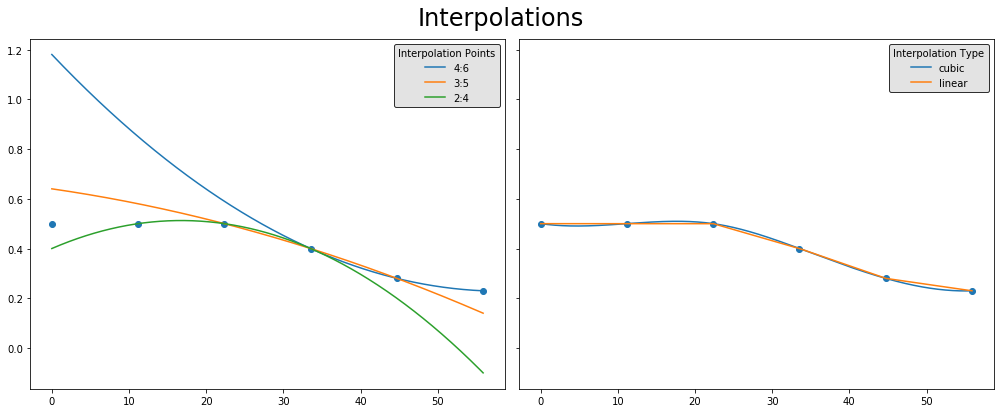

In [5]:
dvec = np.array([0.5, 0.5, 0.5, 0.4, 0.28, 0.23])
#full_vvec = np.linspace(vvec[0],vvec[-1],(vvec[-1] - vvec[0]) * 10, endpoint=True)
full_vvec = np.linspace(vvec[0],vvec[-1],1000, endpoint=True)
full_dvec1 = interpf(full_vvec, vvec[3:6], dvec[3:6])
full_dvec2 = interpf(full_vvec, vvec[2:5], dvec[2:5])
full_dvec3 = interpf(full_vvec, vvec[1:4], dvec[1:4])
f = interpolate.interp1d(vvec, dvec, kind = 'cubic')
bb_dvec = f(full_vvec)
f = interpolate.interp1d(vvec, dvec)
bb_dvec2 = f(full_vvec)


fig, (ax1, ax2) = plt.subplots(sharey = True, nrows = 1, ncols = 2, figsize=(14, 6))
ax1.scatter(vvec, dvec)
ax2.scatter(vvec, dvec)
ax1.plot(full_vvec, full_dvec1, label = '4:6')
ax1.plot(full_vvec, full_dvec2, label = '3:5')
ax1.plot(full_vvec, full_dvec3, label = '2:4')
ax1.legend(title = 'Interpolation Points', facecolor = 'gainsboro', edgecolor = 'black')
ax2.plot(full_vvec, bb_dvec, label = 'cubic')
ax2.plot(full_vvec, bb_dvec2, label = 'linear')
ax2.legend(title = 'Interpolation Type', facecolor = 'gainsboro', edgecolor = 'black')
fig.suptitle('Interpolations', fontsize=24)
fig.tight_layout(rect=[0, 0.03, 1, 0.93])

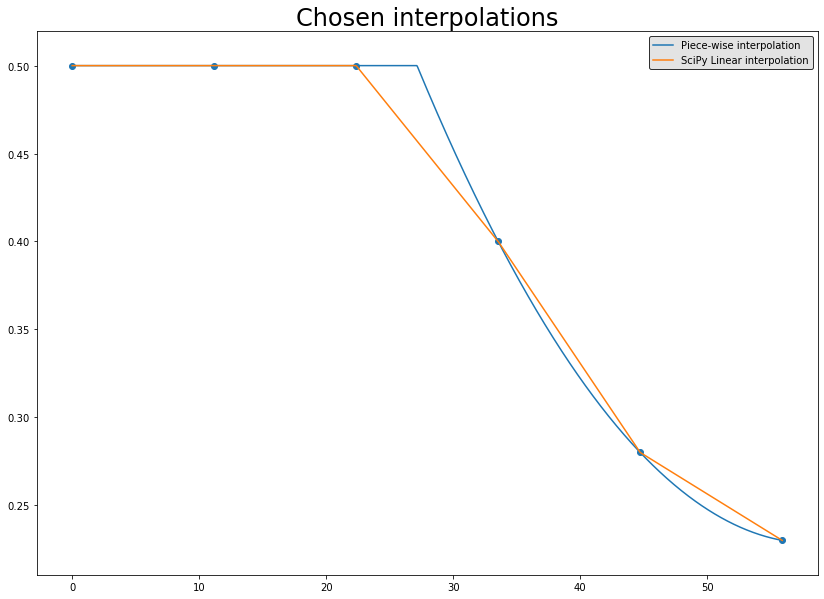

In [6]:
piece_dvec = np.concatenate((np.repeat(.5,len(full_dvec1)-sum(full_dvec1<.5)),
                             full_dvec1[full_dvec1<.5]))
plt.figure(figsize=(14,10))
plt.scatter(vvec, dvec)
plt.plot(full_vvec, piece_dvec, label = 'Piece-wise interpolation')
plt.plot(full_vvec, bb_dvec2, label = 'SciPy Linear interpolation')
plt.title('Chosen interpolations', fontsize=24)
plt.legend(facecolor = 'gainsboro', edgecolor = 'black')

In [11]:
y0=float(1)
vmag=float(50)
theta1=np.radians(np.arange(30, 60.1,step = .1))
rho=1.2
tau=.01
range_mp = []
range_pw = []
range_lin = []
cdlst1 = []
cdlst2 = []
vlst1 = []
vlst2 = []

Cd_mp=.35
Cd_pw=piece_dvec
Cd_lin=bb_dvec2
area=4.3e-3
grav=9.81
mass=.145

#drag=-.5*Cd*rho*area/mass
maxstep=10000000

for theta in theta1:
    v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
    r=np.array([0,y0])
    x=[]
    y=[]
    t=0
    accel=[]
    drag=-.5*Cd_mp*rho*area/mass
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=i*tau
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        vnew=v+tau*accel
        r=r+tau*((v+vnew)/2)
        v=vnew
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t=i*tau
            break
    zoomcoeff=.8
    domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
    domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))
    scale = tau*.01
    estx=np.arange(domlow,domhigh,scale)
    esty=interpf(estx,x[-3:],y[-3:])
    for i in range(len(estx)):
        if esty[i-1] * esty[i] < 0:
            inter_range = estx[i-1]
    range_mp.append(inter_range)

for theta in theta1:
    v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
    r=np.array([0,y0])
    x=[]
    y=[]
    t=0
    accel=[]
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=i*tau
        cdlst1.append(Cd_pw[full_vvec<=np.linalg.norm(v)][-1])
        vlst1.append(np.linalg.norm(v))
        drag=-.5*Cd_pw[full_vvec<=np.linalg.norm(v)][-1]*rho*area/mass
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        vnew=v+tau*accel
        r=r+tau*((v+vnew)/2)
        v=vnew
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t=i*tau
            break
    euler_range=x[-1]
    zoomcoeff=.8
    domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
    domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))
    scale = tau*.01
    estx=np.arange(domlow,domhigh,scale)
    esty=interpf(estx,x[-3:],y[-3:])
    for i in range(len(estx)):
        if esty[i-1] * esty[i] < 0:
            inter_range = estx[i-1]
    range_pw.append(inter_range)

for theta in theta1:
    v=np.array([vmag*np.cos(theta),vmag*np.sin(theta)])
    r=np.array([0,y0])
    x=[]
    y=[]
    t=0
    accel=[]
    for i in range(maxstep):
        x.append(r[0])
        y.append(r[1])
        t=i*tau
        cdlst2.append(Cd_lin[full_vvec<=np.linalg.norm(v)][-1])
        vlst2.append(np.linalg.norm(v))
        drag=-.5*Cd_lin[full_vvec<=np.linalg.norm(v)][-1]*rho*area/mass
        accel=drag*np.linalg.norm(v)*v
        accel[1]=accel[1]-grav
        vnew=v+tau*accel
        r=r+tau*((v+vnew)/2)
        v=vnew
        if r[1]<0:
            x.append(r[0])
            y.append(r[1])
            t=i*tau
            break
    euler_range=x[-1]
    zoomcoeff=.8
    domlow=x[-3]-(zoomcoeff*(x[-1]-x[-3]))
    domhigh=x[-1]+(zoomcoeff*(x[-1]-x[-3]))
    scale = tau*.01
    estx=np.arange(domlow,domhigh,scale)
    esty=interpf(estx,x[-3:],y[-3:])
    for i in range(len(estx)):
        if esty[i-1] * esty[i] < 0:
            inter_range = estx[i-1]
    range_lin.append(inter_range)

plts = [range_mp, range_lin, range_pw]
labs = ['Constant', 'Linear', 'Piecewise']
cols = ['red', 'blue', 'green']
for i in range(3):
    print('%s Max Angle: '%labs[i], np.degrees(theta1[np.argmax(plts[i])]),
         '     %s Max Range: '%labs[i], np.max(plts[i]))

Constant Max Angle:  39.30000000000013      Constant Max Range:  125.78812141009462
Linear Max Angle:  36.20000000000009      Linear Max Range:  122.76700645194735
Piecewise Max Angle:  36.30000000000009      Piecewise Max Range:  122.56268534716331


Text(0, 0.5, 'Range (m)')

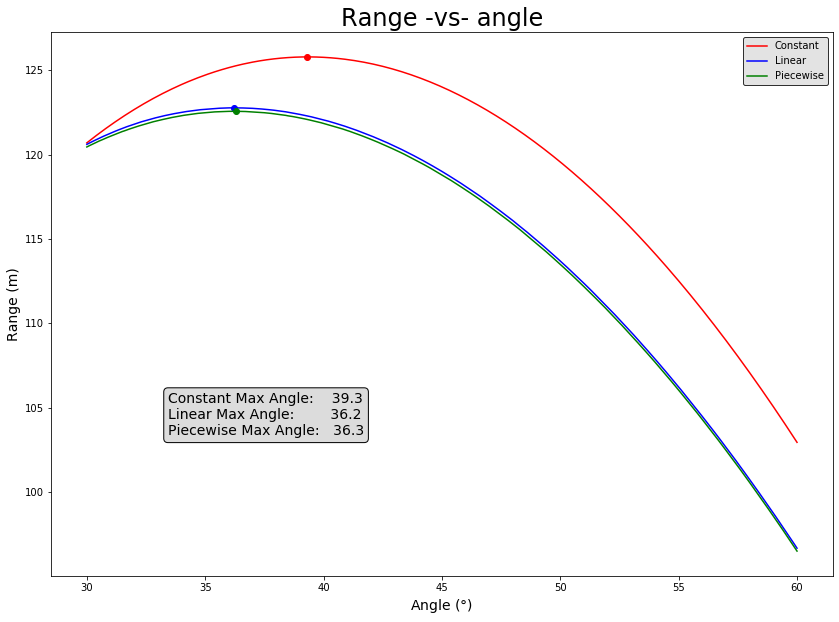

In [13]:
plt.figure(figsize=(14,10))
for i in range(3):
    plt.plot(np.degrees(theta1), plts[i], color = cols[i], label = labs[i])
    plt.plot(np.degrees(theta1[np.argmax(plts[i])]), plts[i][np.argmax(plts[i])],
             color = cols[i], marker = 'o')
plt.legend(facecolor = 'gainsboro', edgecolor='black')
plt.annotate('Constant Max Angle:    %.6g\nLinear Max Angle:        %.6g\nPiecewise Max Angle:   %.6g'%
             (np.degrees(theta1[np.argmax(plts[0])]), 
              np.degrees(theta1[np.argmax(plts[1])]), 
              np.degrees(theta1[np.argmax(plts[2])])),
        xy = (.2, .3), xycoords = 'figure fraction', fontsize = 14,
        bbox=dict(boxstyle="round", fc="gainsboro"))
plt.title('Range -vs- angle', fontsize=24)
plt.xlabel('Angle $(\degree)$', fontsize=14)
plt.ylabel('Range (m)',fontsize=14)

Constant Max Angle:  39.30000000000013      Constant Max Range:  125.78812141009462
Linear Max Angle:  36.20000000000009      Linear Max Range:  122.76700645194735


Text(0, 0.5, 'Range (m)')

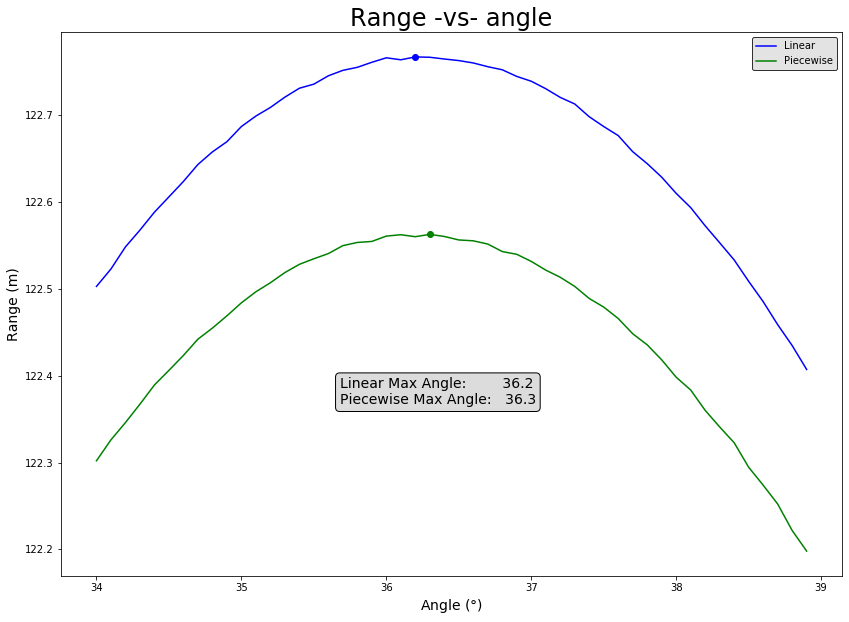

In [69]:
for i in range(2):
    print('%s Max Angle: '%labs[i], np.degrees(theta1[np.argmax(plts[i])]),
         '     %s Max Range: '%labs[i], np.max(plts[i]))
plt.figure(figsize=(14,10))
for i in range(2):
    i+=1
    plt.plot(np.degrees(theta1)[40:90], plts[i][40:90], color = cols[i], label = labs[i])
    plt.plot(np.degrees(theta1[np.argmax(plts[i])]), plts[i][np.argmax(plts[i])],
             color = cols[i], marker = 'o')
plt.annotate('Linear Max Angle:        %.6g\nPiecewise Max Angle:   %.6g'%
             (np.degrees(theta1[np.argmax(plts[1])]), 
              np.degrees(theta1[np.argmax(plts[2])])),
        xy = (.4, .35), xycoords = 'figure fraction', fontsize = 14,
        bbox=dict(boxstyle="round", fc="gainsboro"))
plt.legend(facecolor = 'gainsboro', edgecolor='black')
plt.title('Range -vs- angle', fontsize=24)
plt.xlabel('Angle $(\degree)$', fontsize=14)
plt.ylabel('Range (m)',fontsize=14)

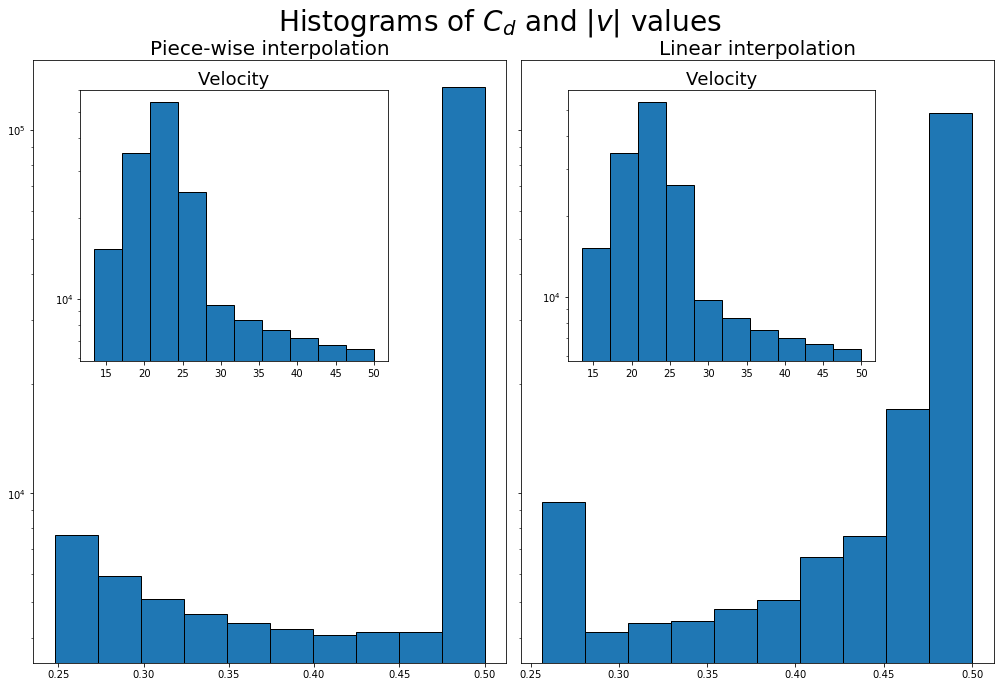

In [18]:
    fig, (ax1, ax2) = plt.subplots(sharey = True, nrows = 1, ncols = 2, figsize=(14,10))
ax1.hist(cdlst1, log=True, edgecolor='black')
axin1 = ax1.inset_axes([0.1, 0.5, 0.65, 0.45])
axin1.hist(vlst1, log=True, edgecolor='black')
axin1.set_title('Velocity',fontsize=18)
ax1.set_title('Piece-wise interpolation',fontsize=20)
ax2.hist(cdlst2, log=True, edgecolor='black')
axin2 = ax2.inset_axes([0.1, 0.5, 0.65, 0.45])
axin2.hist(vlst2, log=True, edgecolor='black')
axin2.set_title('Velocity',fontsize=18)
ax2.set_title('Linear interpolation',fontsize=20)
fig.suptitle('Histograms of $C_d$ and $|v|$ values', fontsize=28)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [34]:
kde_estim = gaussian_kde(vlst1, bw_method='scott')
linearized = np.linspace(min(vlst1), max(vlst1), num=len(full_vvec))
Z = kde_estim.evaluate(linearized)


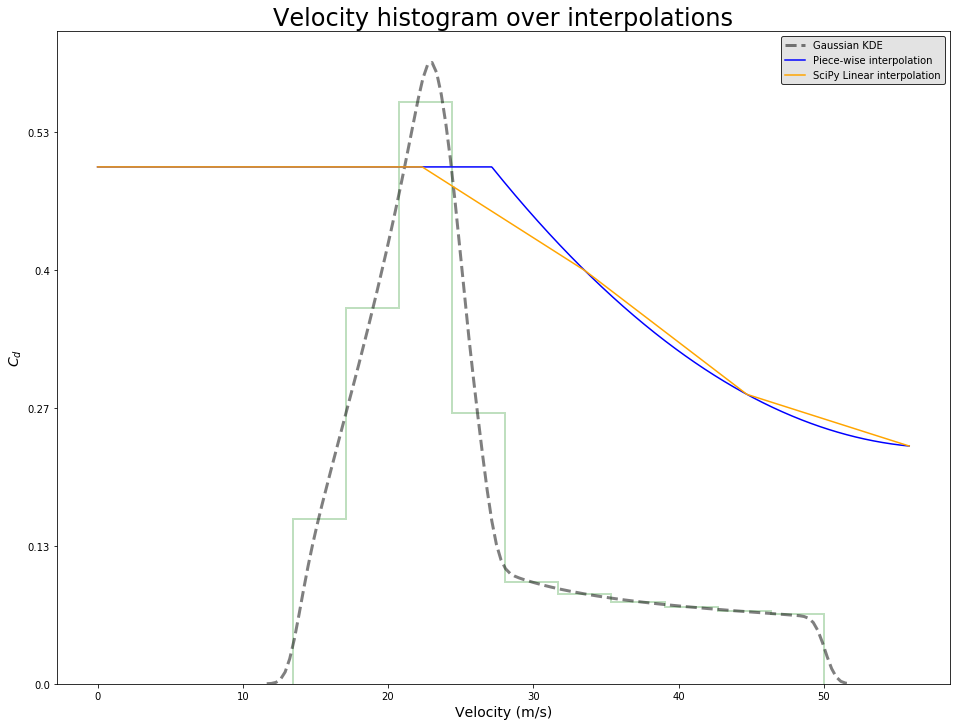

In [68]:
kde_estim = gaussian_kde(vlst1, bw_method='scott')
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.distplot(vlst1, bins=10,
                  kde_kws={"color": "k", "lw": 3, "label": "Gaussian KDE",
                          "alpha": .5, "ls":"--"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": .25, "color": "g"})
ax.plot(full_vvec, piece_dvec * .15, label = 'Piece-wise interpolation', color = 'blue')
ax.plot(full_vvec, bb_dvec2 * .15, label = 'SciPy Linear interpolation', color = 'orange')
ax.set_title('Velocity histogram over interpolations', fontsize=24)
ax.set_xlabel('Velocity (m/s)', fontsize=14)
ax.set_ylabel('$C_d$', fontsize=14)
ax.set_yticklabels([str(i) for i in np.round(ax.get_yticks()/.15, 2)])
ax.get_yticks()
ax.legend(facecolor = 'gainsboro', edgecolor = 'black', loc = 'upper right')
locs = ax.get_yticks()/.15
